In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

In [2]:
customer_acq=pd.read_csv("D:/anylitics l/case study files/python/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
customer_acq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [3]:
customer_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [4]:
customer_acq.Age.mean()

46.49

Q1. In the above dataset,
   
   a. In case age is less than 18, replace it with mean of age values.

In [5]:
customer_acq.loc[(customer_acq.Age<18),"Age"]=customer_acq.Age.mean()
customer_acq[customer_acq["Age"]==46.49]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,46.49,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,46.49,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,46.49,COCHIN,Gold,500000.0,C13,Govt


In [6]:
spend=pd.read_csv('D:\\anylitics l\\case study files\\python\\Python Foundation Case Study 2 - Credit Card Case Study\\spend.csv')
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [7]:
customer_spend = pd.merge(left=customer_acq,right=spend,on="Customer")
customer_spend 

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


Q1) b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [8]:
customer_spend["Amount"]=np.where(customer_spend.Amount>customer_spend.Limit,customer_spend.Limit/2,customer_spend.Amount)
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


In [10]:
repayment=pd.read_csv('D:\\anylitics l\\case study files\\python\\Python Foundation Case Study 2 - Credit Card Case Study\\repayment.csv')
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [11]:
repayment.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1518,NaN,NaN,NaN
1519,NaN,NaN,NaN
1520,NaN,NaN,NaN
1521,NaN,NaN,NaN


In [12]:
repayment.dropna(axis=0,inplace=True)
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [13]:
customer_repayment = pd.merge(left=customer_acq,right=repayment,on="Customer")
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [14]:
#Q1(c)
customer_repayment["Amount"]=np.where(customer_repayment.Amount>customer_repayment.Limit,
                                      customer_repayment.Limit,customer_repayment.Amount)
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


Q2. From the above dataset create the following summaries:

a. How many distinct customers exist?



In [15]:
customer_acq["Customer"].drop_duplicates().count()

100

b. How many distinct categories exist?

In [16]:
customer_acq["Product"].nunique()

3

c. What is the average monthly spend by customers?

In [80]:
spend['Month'] = pd.to_datetime(spend['Month'])
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [81]:
months_spend= spend.groupby(['Yearly','Monthly']).mean()
months_spend

Sl No:         Amount
Yearly Monthly                             
2004   April      730.500000  235272.037143
       February   749.500000  221215.270000
       January    751.622150  251712.068664
       March      725.500000  232146.119286
       May        733.500000  217539.236429
       November   745.500000  270486.397857
       September  741.500000  310923.383571
2005   April      730.000000  252181.326429
       August     749.500000  233734.634286
       December   762.500000  147503.060000
       February   750.666667  229802.279821
       January    746.500000  292741.372857
       July       757.500000  229116.663571
       June       755.500000  262688.112857
       May        747.300000  245696.515429
       November   749.500000  286143.322857
       October    760.500000  194568.640714
       September  759.500000  188666.202143
2006   April      744.414894  232468.967553
       August     770.500000  240699.717143
       December   774.500000  270470.980714
       February   757.833333  253858.260714
       January    763.500000  282058.006429
       July       754.500000  287505.098929
       June       768.500000  177252.386429
       March      750.903226  247166.084654
       May        744.250000  236162.740357
       November   758.500000  182841.290000
       October    772.500000  236136.335000
       September  771.500000  158520.090714

d. What is the average monthly repayment by customers?



In [78]:
repayment["Month"] = pd.to_datetime(repayment["Month"])
repayment['Monthly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repayment['Yearly'] = repayment['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [79]:
monthly_repayment= repayment.groupby(['Yearly','Monthly']).mean()
monthly_repayment

Amount
Yearly Monthly                 
2004   April      259141.679000
       February   256702.630741
       January    243489.649786
       March      252585.280667
       May        226162.720800
       November   209592.238000
       September  184487.848750
2005   April      212688.631333
       August     264430.921622
       December   320379.335833
       February   238829.265123
       January    240548.098148
       July       239871.479167
       June       210199.818333
       May        263207.367857
       November   256695.120000
       October    219849.956667
       September  247700.170000
2006   April      275472.251889
       August     224143.992500
       December   252736.569167
       February   284489.565128
       January    293475.389167
       July       257936.383243
       June       251990.453333
       March      240851.266814
       May        256920.884943
       November   199399.197407
       October    260765.480000
       September  262533.880833

e. If monthly rate of interst 2.9%, what is the profit for the bank for each month 

In [75]:
customer_spend_repay = pd.merge(left=customer_spend,right=repayment,on="Customer",how="inner")
customer_spend_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,2004-01-15,25682.73,January,2004


In [82]:
interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Amount_x','Amount_y'].sum()
interest_group['Monthly Profit'] = interest_group['Amount_y'] - interest_group['Amount_x']
interest_group['Interest Earned'] = (2.9* interest_group['Monthly Profit'])/100
interest_group

C:\Users\asus\AppData\Local\Temp\ipykernel_18176\2862843189.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Amount_x','Amount_y'].sum()


Amount_x      Amount_y  Monthly Profit  Interest Earned
Yearly Monthly                                                               
2004   April      1.194516e+08  2.285403e+08    1.090887e+08     3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07     2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08     1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07     9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07     1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07     6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07     8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07     2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08     3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07     1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08     1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07     1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07     1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08     3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08     1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08     3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07     8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07     1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08     8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07     3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07     7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08     3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07     1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07     2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07     4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08     1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08     6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07     6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07     7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07     7.793803e+05

f. What are the top 5 product types?



In [83]:
spend['Type'].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

g. Which city is having maximum spend?



In [84]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)
city_spend.head(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

h. Which age group is spending more money?



In [85]:
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(10,90,10),labels=["10-20","20-30", "30-40" ,"40-50" ,"50-60","60-70","70-80"],include_lowest=True)
age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)
age_spend.head(1)

Age Group
40-50    57048361.87
Name: Amount, dtype: float64

i. Who are the top 10 customers in terms of repayment?



In [87]:
customer_repayment.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


Q3 Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [88]:
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
customer_spend_pivot = pd.pivot_table(data = customer_spend,index=["City","Year"],
                                      columns='Product',aggfunc="sum",values="Amount")
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

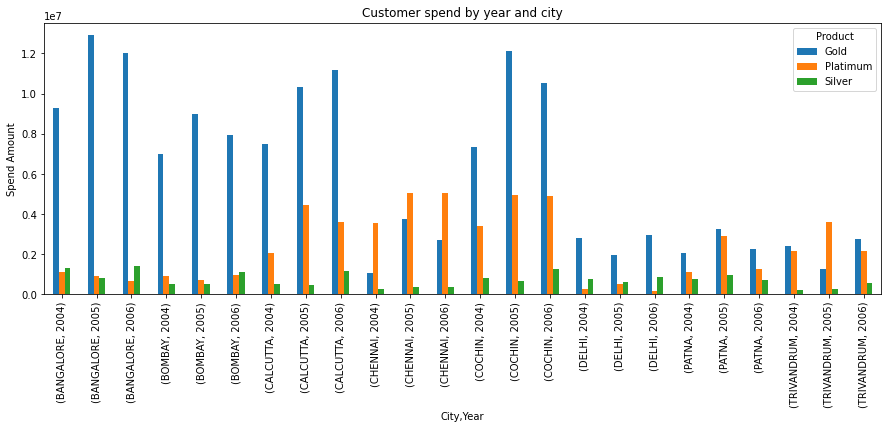

In [89]:
customer_spend_pivot.plot(kind="bar",figsize=(15,5))
plt.ylabel("Spend Amount")
plt.title("Customer spend by year and city")
plt.show()

Q4. Create graphs for

a. Monthly comparison of total spends, city wise

In [90]:
customer_spend['Monthly'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
month_city = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_index().reset_index()
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')
month_city

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


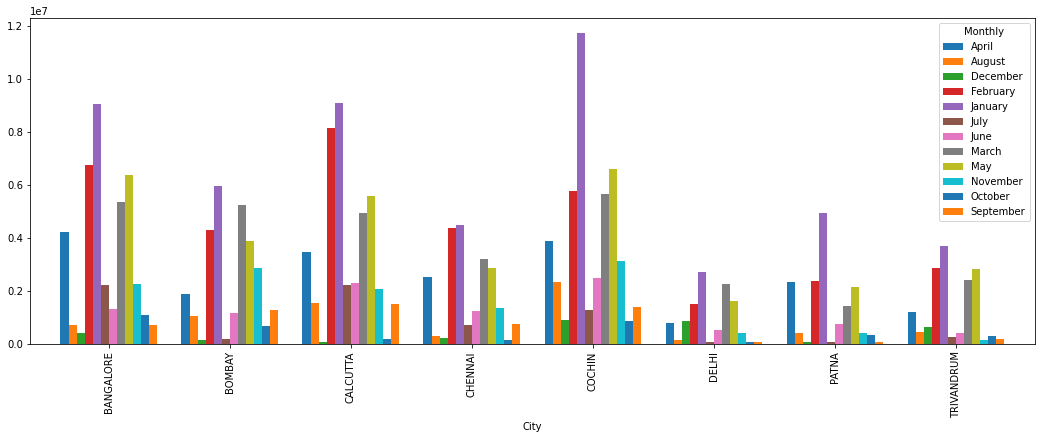

In [91]:
month_city.plot(kind="bar",figsize=(18,6),width=0.8)
plt.show()

b. Comparison of yearly spend on air tickets



In [92]:
air_tickets = customer_spend.groupby(["Year","Type"])[["Amount"]].sum().reset_index()
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


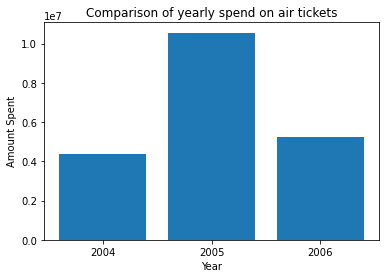

In [93]:
plt.bar(filtered["Year"],height=filtered["Amount"])
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

In [94]:
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


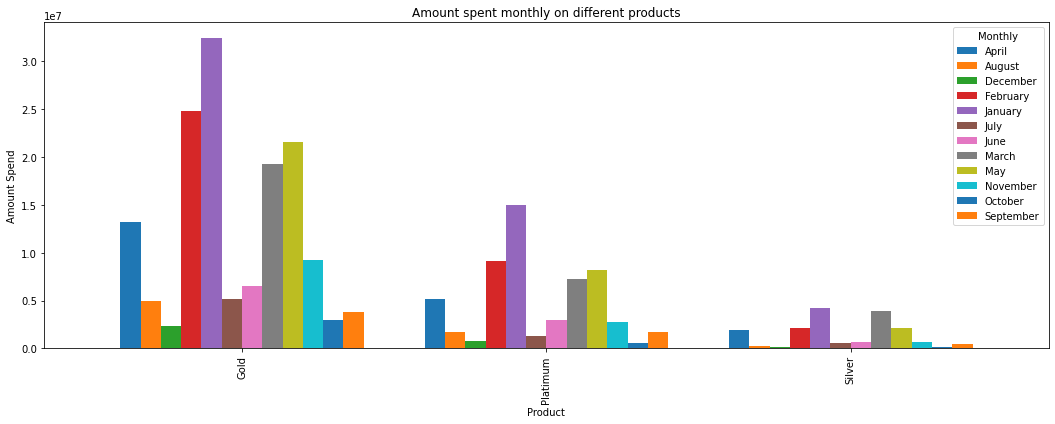

In [95]:
product_wise.plot(kind="bar",figsize=(18,6),width=0.8)
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

Q5 Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [97]:
customer_repayment["yearly"]=customer_repayment["Month"].apply(lambda x:x.year)
customer_repayment["monthly"]=customer_repayment["Month"].apply(lambda x:x.month)
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,month_number,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,1,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,1,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,1,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,1,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,1,2005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,1,2004,1
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,1,2004,1
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,1,2004,1
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,1,2004,1


In [98]:
top_ten_customer=pd.pivot_table(data=customer_repayment,
                            index='Product',columns=['month_number','City'],
                            values='Amount',aggfunc='sum')
top_ten_customer

month_number          1                                                   \
City           BANGALORE      BOMBAY    CALCUTTA     CHENNAI      COCHIN   
Product                                                                    
Gold          8373392.04  5495004.58  6083577.48  1283196.53  6441125.96   
Platimum       873873.76   702094.48  1879101.51  1742122.21  3569499.60   
Silver        1328028.33   900000.00   533811.62   480193.34  1249892.55   

month_number                                              2               ...  \
City               DELHI       PATNA  TRIVANDRUM   BANGALORE      BOMBAY  ...   
Product                                                                   ...   
Gold          2758039.05  1976273.11  1034461.46  6399922.02  3307959.90  ...   
Platimum       140309.31   781731.00  1615123.57   659072.11   703918.51  ...   
Silver        1084643.62  1313626.32   500004.00  1080002.40   449817.89  ...   

month_number         11                    12                                  \
City              PATNA TRIVANDRUM  BANGALORE    BOMBAY   CALCUTTA    CHENNAI   
Product                                                                         
Gold          255915.07        NaN  388821.96  479227.3        NaN  136860.63   
Platimum      297365.80  725146.71  110003.00  110003.0  179788.15  654763.91   
Silver        200002.00  200002.00        NaN       NaN        NaN        NaN   

month_number                                              
City             COCHIN      DELHI      PATNA TRIVANDRUM  
Product                                                   
Gold          410935.52  292310.69  417177.67  451630.26  
Platimum      225721.14  100003.00        NaN  278687.47  
Silver        100001.00  127400.18        NaN  100001.00  

[3 rows x 93 columns]

In [99]:
customer_repayment.groupby(['City','Product','Customer','month_number'])[['Amount']].sum().head(10)


Amount
City      Product Customer month_number            
BANGALORE Gold    A1       1             2407806.29
                           2              781873.80
                           4              508949.16
                           7              297176.74
                           9              186427.50
                           11             571458.18
                  A13      1             2014186.98
                           2             2049808.15
                           3             1183569.05
                           4              494392.40

In [100]:
def top_10_customer(product_name,time_period):
    return customer_repayment.loc[(customer_repayment.Product==product_name)].groupby(['Customer','City','Product',time_period])[['Amount']].sum().sort_values('Amount',ascending=False).head(10)

In [109]:
product_name=str(input())
time_period=str(input())

Gold
yearly


In [110]:
top_10=top_10_customer(product_name,time_period)
top_10

,,,,Amount
Customer,City,Product,yearly,
A61,COCHIN,Gold,2005,4276860.55
A44,DELHI,Gold,2005,4165317.77
A45,COCHIN,Gold,2005,4042447.57
A43,BANGALORE,Gold,2005,4006956.60
A13,BANGALORE,Gold,2005,3757673.00
A61,COCHIN,Gold,2006,3744127.41
A60,CALCUTTA,Gold,2005,3742856.10
A13,BANGALORE,Gold,2006,3477314.89
A29,CALCUTTA,Gold,2006,3434298.00
